In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Classifiers:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dat200-ca4-2020/glassTest.csv
/kaggle/input/dat200-ca4-2020/sample_solution.csv
/kaggle/input/dat200-ca4-2020/glassTrain.csv


In [2]:
# Read Train data as dataframe:
df = pd.read_csv("/kaggle/input/dat200-ca4-2020/glassTrain.csv", index_col="Unnamed: 0")

# Read Test data as dataframe:
df_test = pd.read_csv("/kaggle/input/dat200-ca4-2020/glassTest.csv", index_col="Unnamed: 0")

# Some functions:

## Model Selection:
- Convert data frame to numpy array and split X_train, y-Train, X_test and y_test:

In [46]:
def split_samples(df, remove_cols=None, test_size=0.20, random_state=1):
    if remove_cols == None:
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

        return train_test_split(X, y, test_size=test_size,
                                stratify=y, random_state=random_state)
    
    else:
        if not isinstance(remove_cols, list):
            raise TypeError("The argument <remove_cols> must be list.")
            
        X = df.drop(remove_cols, axis=1).values
        y = df.iloc[:, -1].values
            
        return train_test_split(X, y, test_size=test_size,
                                stratify=y, random_state=random_state)

## Learning Curve Visualization:
- Take the train and test scores and sizes and plot the bias and variance lines:

In [4]:
def learn_curve_visualization(train_sizes, train_scores, test_scores):
    # Calculate learning curves for training- and test sets:
    train_mean = np.mean(train_scores, axis = 1)   # Predict training data
    train_std  = np.std(train_scores,  axis = 1)
    test_mean  = np.mean(test_scores,  axis = 1)   # Cross-validation
    test_std   = np.std(test_scores,   axis = 1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Learning curves by introducing more training samples')
    plt.ylim([0.2, 1.03])
    plt.tight_layout()
    plt.show()

# Validation Curve (addressing over- and underfitting):

In [98]:
def validation_curve_visualization(param_name, param_range, 
                                   train_scores, test_scores):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='Training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')

    plt.plot(param_range, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='Validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Parameter {}'.format(param_name))
    plt.ylabel('Accuracy')
    plt.title('Training/Validation curves as func. of parameter {}'.format(param_name))
    plt.ylim([0.2, 1.0])
    plt.tight_layout()
    plt.show()

# Chack raw data:

In [ ]:
# Verigy data frame dimensions:
print("Train dimension: ", df.shape,
      "\nTest dimension: ", df_test.shape)

In [ ]:
# Verify null and duplucated samples:
print("Train Data Frame:", 
      "\n# of null/missing values:", df.isnull().any().sum(),
      "\n# of duplicated samples:", df.duplicated().sum(),
      "\n\nTest Data Frame:",
      "\n# of null/missing values:", df_test.isnull().any().sum(),
      "\n# of duplicated samples:", df_test.duplicated().sum())

In [ ]:
# Verify targets sizes:
df.groupby("type").size()

**Conclusions:**
- Train data very small, only 143 samples;
- There are not missing data or duplicated samples in df or df_test;
- 7 unbalanced target classes: Some classes have a scarce number of samples, as class "6" with 6 samples and class "5" with 9 samples. This can be a problem and might not be sufficient when we train our models;

# Check correlations:

In [ ]:
# Check correlations:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

***Conclusions:***
- 1) "Mg" feature has the **highest (-0,74) negative correlation** with the target;
- 2) Only "Al", "Ba" features have positive (0.57 and 0.53) correlations **larger than 0.5** with the target;
- 3) "RI", "Fe" and "Ca" features have **negative (-0.17, -0.14, -0,029) correlations** with the target;
- 4) "RI" and "Ca" features have the **highest (0.78) correlation between features**;
- 5) No other combination of features has high correcaltion.

# Check distributions and outliers:

In [ ]:
# Check distributions:
df.hist(figsize=(10,10), bins=50)
plt.show()

In [ ]:
# Check outliers:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=df[["RI", "Na", "Ca", "Mg", "Al", "K", "Ba", "Fe", "type"]], ax=ax)
plt.show()

In [ ]:
# Check outliers:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=df.Si, ax=ax)
plt.show()

In [ ]:
df.describe()

***Conclusions:***
- 1) The target classes are very unbalanced;
- 2) "Mg and "K" features have biased and not symmetrical distribution. These can not be standardised, according to descriptive statistics;
- 3) "Al", "Na", "RI", "Si", "Ca" features have quite symmetrical distributions. These can be standardised, according to descriptive statistics, in order to neutralize outliers;
- 4) "Fe", "Ba" features have many zero values. It might be a good idea to remove them, because too many zero values mean that the features do not have much relevance;
- 5) There are many outliers in each feature. However, it is not feasible to remove all of them, because It will meaningly reduce the data frame size and hide important informations. It might be wiser to try other technniques, like standardisation.

# Create train Scenarios:
- 1) X and y for sets of raw data;
- 2) X1 and y1 for sets of removed negative correlation with the target;
- 3) X2 and y2 for sets of removed features with many zero values;

In [75]:
# df columns: # ["RI", "Fe", "Ca", "Na", "Mg", "Al", "Si", "K", "Ba"]

# Split raw dataset in numpy arrays:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split train and test data:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

# Drop features with low negative correlations with the target:
# ["RI", "Fe", "Ca"] 
X1 = df.drop(["RI", "Fe", "Ca"], axis=1).values
y1 = df.iloc[:, -1].values

# Split train and test data:
X1_train, X1_test, y1_train, y1_test = \
    train_test_split(X1, y1, test_size=0.20, stratify=y1, random_state=1)

# Drop features with many zero values:
#: old [Fe", "K", "Ba"]
X2 = df.drop(["Fe", "Ba"], axis=1).values
y2 = df.iloc[:, -1].values

# Split train and test data:
X2_train, X2_test, y2_train, y2_test = \
    train_test_split(X2, y2, test_size=0.20, stratify=y2, random_state=1)

In [76]:
types = [1, 2, 3, 5, 6, 7]
df_rs = pd.DataFrame()

for i in types:
    resambled_df = resample(df[df.type == i], replace=True, n_samples=50, random_state=100)
    df_rs = pd.concat([df_rs, resambled_df])

# View target class balances:
# print("df_rs:", "\n", df_rs.type.value_counts())

# Convert df to numpay array:
X3 = df_rs.iloc[:, :-1].values
y3 = df_rs.iloc[:, -1].values

# Split train and test data:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, 
                                                        test_size=0.20,
                                                        stratify=y3,
                                                        random_state=1)

In [77]:
train_scenarios = [("Scenario 1 - Without any features modification", X_train, y_train, X_test, y_test),
                   ("Scenario 2 - Without low and negative correlation features", X1_train, y1_train, X1_test, y1_test),
                   ("Scenario 3 - Without many zero value features", X2_train, y2_train, X2_test, y2_test),
                   ("Scenario 4 - Oversampled and balanced target classes", X3_train, y3_train, X3_test, y3_test)]

# Call Classifiers:
- SVM() as svm:
- RandomForestClassifier() as rf:

In [83]:
svm = SVC(C=10, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
          shrinking=True, probability=False, tol=0.001, cache_size=200, 
          class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
          break_ties=False, random_state=100)

rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                            random_state=100, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

# Train feature samples:

1) Pipelines:
- Make pipelines for Support Vector Machines and Random Forest Classifier;

2) Cross Validation scores:
- View scores, mean of the scores and standard deviation;

3) Learning curves:
- Assessing bias and variance problems. 
- We will use a pipeline and see how training and test scores change with amount of data used for modelling.

4) Validation Curve for parameters:
- SVM: gamma
- RF: max_depth

In [85]:
# make_pipeline(Scaling, Feature compressions, Classifier):
pipe_svm = make_pipeline(svm)
pipe_rf = make_pipeline(rf)


 Scenario 1 - Without any features modification 


Support Vector Machine =======================

 Train Accuracy SVM: 0.360
 Test Accuracy SVM: 0.345
 CV accuracy scores: [0.34782609 0.34782609 0.39130435 0.34782609 0.36363636]
 CV accuracy: 0.360 +/- 0.017


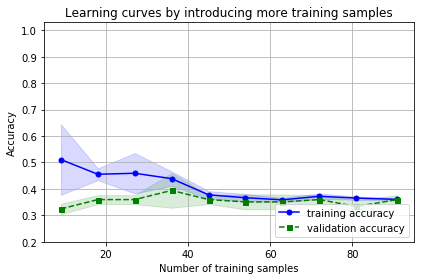

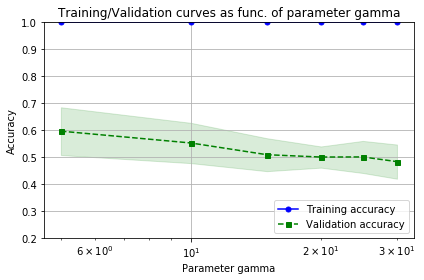


Random Forest Classifier =======================

 Train Accuracy Random Forest Classifier: 1.000
 Test Accuracy Random Forest Classifier: 0.862

 CV accuracy scores: [0.65217391 0.69565217 0.56521739 0.69565217 0.81818182]
 CV accuracy: 0.685 +/- 0.082


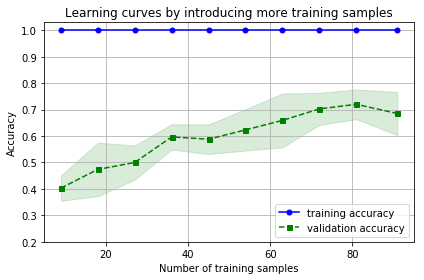

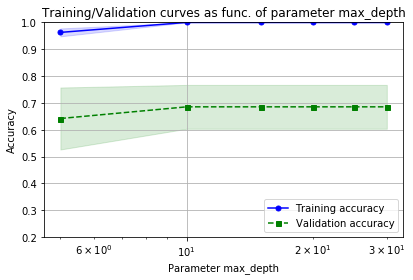

# =================================================

 Scenario 2 - Without low and negative correlation features 


Support Vector Machine =======================

 Train Accuracy SVM: 0.491
 Test Accuracy SVM: 0.483
 CV accuracy scores: [0.47826087 0.47826087 0.52173913 0.47826087 0.5       ]
 CV accuracy: 0.491 +/- 0.017


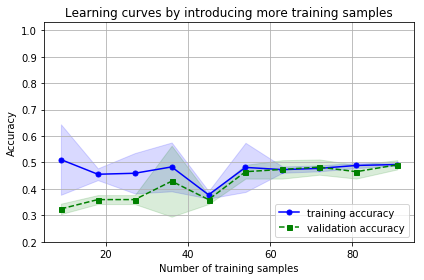

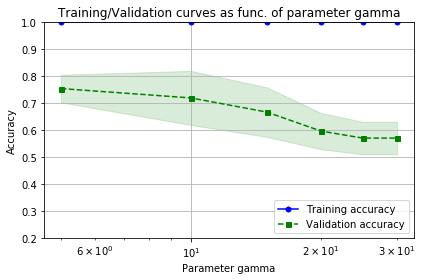


Random Forest Classifier =======================

 Train Accuracy Random Forest Classifier: 1.000
 Test Accuracy Random Forest Classifier: 0.966

 CV accuracy scores: [0.95652174 0.95652174 1.         1.         0.90909091]
 CV accuracy: 0.964 +/- 0.034


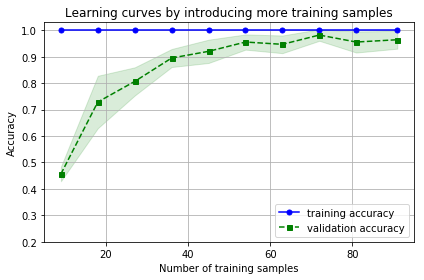

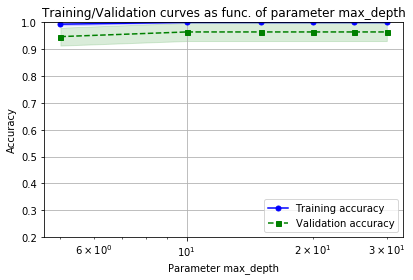

# =================================================

 Scenario 3 - Without many zero value features 


Support Vector Machine =======================

 Train Accuracy SVM: 0.491
 Test Accuracy SVM: 0.483
 CV accuracy scores: [0.47826087 0.47826087 0.52173913 0.47826087 0.5       ]
 CV accuracy: 0.491 +/- 0.017


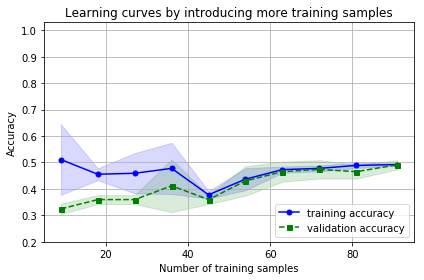

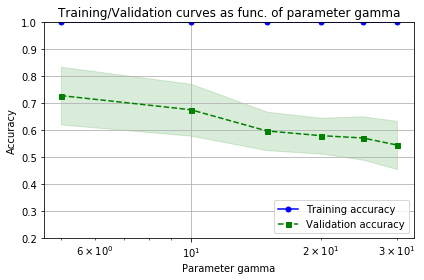


Random Forest Classifier =======================

 Train Accuracy Random Forest Classifier: 1.000
 Test Accuracy Random Forest Classifier: 0.966

 CV accuracy scores: [0.91304348 1.         1.         1.         0.90909091]
 CV accuracy: 0.964 +/- 0.044


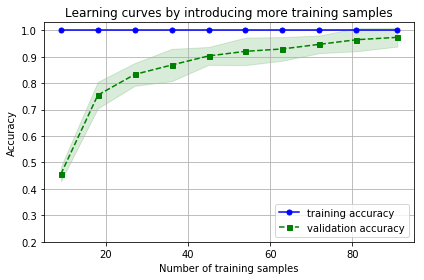

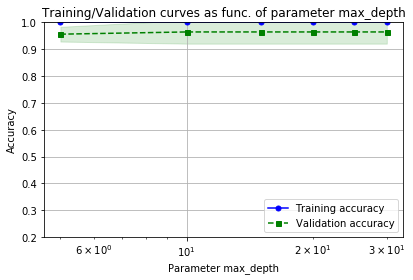

# =================================================

 Scenario 4 - Oversampled and balanced target classes 


Support Vector Machine =======================

 Train Accuracy SVM: 0.500
 Test Accuracy SVM: 0.450
 CV accuracy scores: [0.5        0.60416667 0.5        0.45833333 0.375     ]
 CV accuracy: 0.487 +/- 0.074


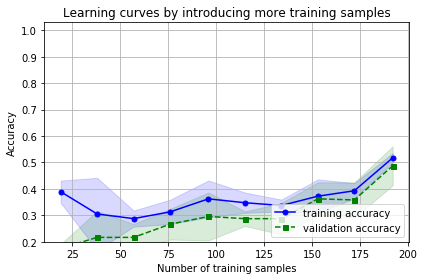

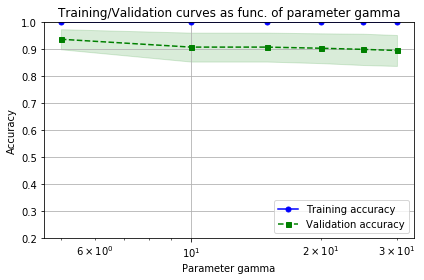


Random Forest Classifier =======================

 Train Accuracy Random Forest Classifier: 1.000
 Test Accuracy Random Forest Classifier: 0.917

 CV accuracy scores: [0.97916667 1.         0.97916667 0.91666667 0.9375    ]
 CV accuracy: 0.963 +/- 0.031


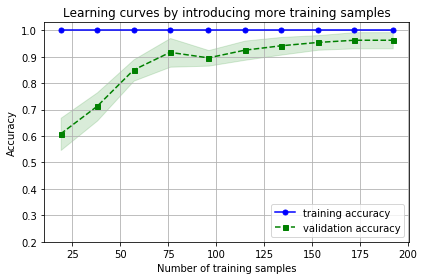

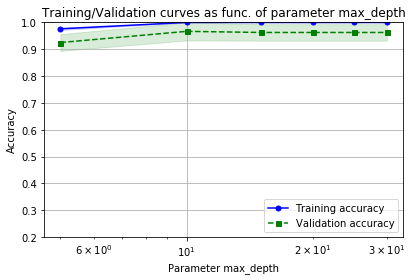

# =================================================


In [99]:
# Train, predict and show test accuracy:
for idx, X_train, y_train, X_test, y_test in train_scenarios:
    print("\n", idx, "\n")
    print("\nSupport Vector Machine =======================\n")
    
    # Train features:
    pipe_svm.fit(X_train, y_train)
    print(' Train Accuracy SVM: %.3f' % pipe_svm.score(X_train, y_train))
    print(' Test Accuracy SVM: %.3f' % pipe_svm.score(X_test, y_test))
    
    # Cross Validation Scores:
    scores_svm = cross_val_score(estimator=pipe_svm,
                                 X=X_train, y=y_train, cv=5, n_jobs=-1)
    
    print(' CV accuracy scores: %s' % scores_svm)
    print(' CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svm), np.std(scores_svm)))
    
    # Learning Curve:
    train_sizes, train_scores, test_scores =\
        learning_curve(estimator=pipe_svm,
                       X = X_train, y = y_train,
                       train_sizes=np.linspace(0.1, 1.0, 10),
                       cv= 5, n_jobs=-1)

    learn_curve_visualization(train_sizes, train_scores, test_scores)
    
    # Validation Curve for the parameter "gama":
    param_range = [5, 10, 15, 20, 25, 30]
    
    train_scores, test_scores = \
        validation_curve(estimator=svm, 
                         X=X_train, y=y_train,
                         param_name="gamma",
                         param_range=param_range,
                         cv=5)
    
    validation_curve_visualization("gamma", param_range, train_scores, test_scores)
    
    
    print("\nRandom Forest Classifier =======================\n")
    
    # Train features:
    pipe_rf.fit(X_train, y_train)
    print(' Train Accuracy Random Forest Classifier: %.3f' % pipe_rf.score(X_train, y_train))
    print(' Test Accuracy Random Forest Classifier: %.3f' % pipe_rf.score(X_test, y_test))
    
    # Cross Validation Scores:
    scores_rf = cross_val_score(estimator=pipe_rf,
                                X=X_train, y=y_train, cv=5, n_jobs=-1)
    
    print('\n CV accuracy scores: %s' % scores_rf)
    print(' CV accuracy: %.3f +/- %.3f' % (np.mean(scores_rf), np.std(scores_rf)))
    
    # Learning Curve:
    train_sizes, train_scores, test_scores =\
        learning_curve(estimator=pipe_rf,
                       X = X_train, y = y_train,
                       train_sizes=np.linspace(0.1, 1.0, 10),
                       cv= 5, n_jobs=-1)

    learn_curve_visualization(train_sizes, train_scores, test_scores)

    # Validation Curve for the parameter "max_depth":
    param_range = [5, 10, 15, 20, 25, 30]
    
    train_scores, test_scores = \
        validation_curve(estimator=rf, X=X_train, y=y_train,
                         param_name="max_depth",
                         param_range=param_range,
                         cv=5)
    
    validation_curve_visualization("max_depth", param_range, train_scores, test_scores)
    
    print("# =================================================")

***Conclusions:***
- 1) The models with highest scores are the ones with removed features with many zero values;
- 2) The X3 and y3 model have a very small variance, however it has a very large bias because of the oversampled features.